<a href="https://colab.research.google.com/github/AnjanPayra/Opinion_Voter_Latane/blob/main/SznajdModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import necessary libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
np.random.seed(42) # intializing the random seed

## **Helper Functions**

A helper function : this is used for visualizing the population of agents.

In [ ]:
def plot_opinions(lattice, title="Opinion Distribution", cmap=None, norm=None):
  """Plot the current state of the lattice with opinion values inside the boxes."""
  fig, ax = plt.subplots(figsize=(8, 8))
  cax = ax.imshow(lattice, cmap=cmap, norm=norm)
  ax.set_xticks(np.arange(-0.5, lattice.shape[1], 1), minor=True)
  ax.set_yticks(np.arange(-0.5, lattice.shape[0], 1), minor=True)
  ax.grid(which="minor", color="black", linestyle="-", linewidth=0.5)
  ax.tick_params(which="both", bottom=False, left=False, labelbottom=False, labelleft=False)

  # Adding a color bar
  plt.colorbar(cax, label="Opinion Value")

  # Annotating each agent with its current opinion
  for i in range(lattice.shape[0]):
    for j in range(lattice.shape[1]):
      ax.text(j, i, str(lattice[i, j]), ha='center', va='center', color='white', fontsize=8)

  plt.title(title)
  plt.show()

A helper function: this is used to find the immediate neighbours for each agent.

In [ ]:
def findNeighbours(x1, y1, x2, y2, L):
  """Here I define a set named neighbours the unique neighbors of the cell pair (x1, y1) and (x2, y2) on a lattice of size L."""
  neighbours = set()
  # Finding the neighbors of the first cell i.e. (x1, y1)
  neighbours.update({((x1 - 1) % L, y1), ((x1 + 1) % L, y1), (x1, (y1 - 1) % L), (x1, (y1 + 1) % L)})
  # Finding the neighbours of the second cell (x2, y2)
  neighbours.update({((x2 - 1) % L, y2), ((x2 + 1) % L, y2), (x2, (y2 - 1) % L), (x2, (y2 + 1) % L)})
  # Remove the pair cells overlaping ones, to avoid self-influence
  neighbours.discard((x1, y1))
  neighbours.discard((x2, y2))
  return neighbours

## **Defining the lattice.**

In [ ]:
def initialize_lattice(L):
    """Initialize an LxL lattice with random opinion values between 1 and L^2 / 2."""
    # Define the upper bound for the opinions
    max_opinion = L * L // 2
    # Create an array of random values from 1 to max_opinion
    lattice = np.random.randint(1, max_opinion + 1, size=(L, L))
    return lattice

## **Sznajd Sim**

In [ ]:
def update_opinion_(lattice, x, y):
  """Update the opinion of neighbors based on the Sznajd model for a 2D lattice."""
  L = lattice.shape[0]
  # Select a neighboring pair (right or down) to form a pair
  if random.choice([0, 1]) == 0:
    x2, y2 = (x + 1) % L, y
  else:
    x2, y2 = x, (y + 1) % L

  # If the selected pair has the same opinion, influence the unique neighbors
  if lattice[x, y] == lattice[x2, y2]:
    # Get unique neighbors of the pair
    unique_neighbors = findNeighbours(x, y, x2, y2, L)
    # Update the neighbors to match the opinion of the pair
    for nx, ny in unique_neighbors:
      lattice[nx, ny] = lattice[nx, ny] + np.sign(lattice[x, y]-lattice[nx, ny])
  return lattice

In [ ]:
def sznajdSim(lattice, steps, stepSize_, cmap, norm):
  """Run the Sznajd model simulation on a lattice."""
  countOpinions = []
  unique_elements_count = len(np.unique(lattice))
  countOpinions.append(unique_elements_count)
  L = lattice.shape[0]
  print(steps)
  for run in range(steps):
    # Randomly select a cell in the lattice
    #choose 400 pairs
    for _ in range(400):
      x, y = random.randint(0, L - 1), random.randint(0, L - 1)
      lattice = update_opinion_(lattice, x, y)
    unique_elements_count = len(np.unique(lattice))
    countOpinions.append(unique_elements_count)
    if (run+1) % stepSize_ == 0:
      plot_opinions(lattice, title=f"Epoch {run+1}", cmap=cmap, norm=norm)
    if unique_elements_count == 1:
      print(f"Converged after {run+1} epochs. with count {unique_elements_count}")
      plot_opinions(lattice, title="Final Opinion Distribution")
      return countOpinions

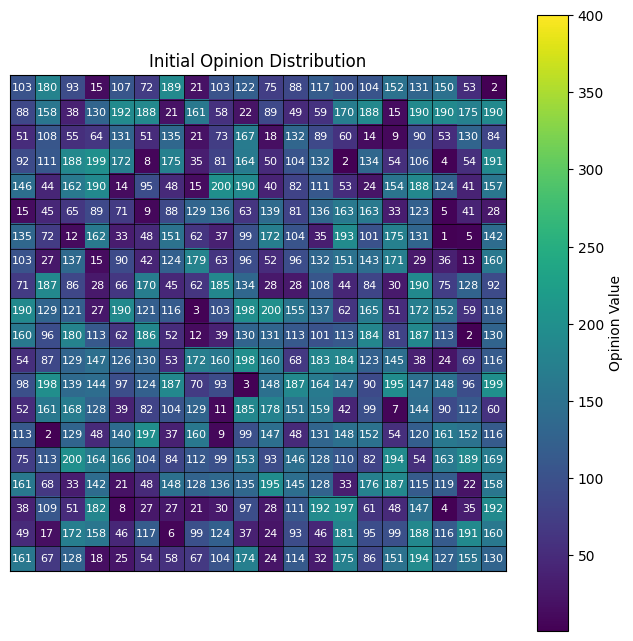

100000


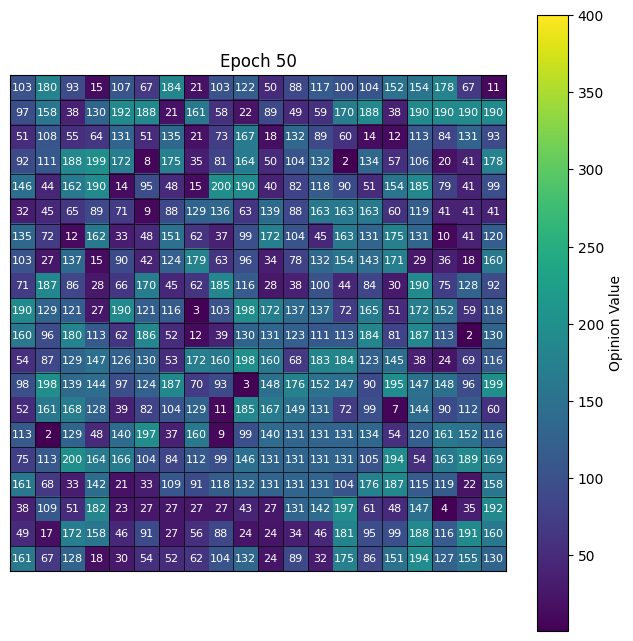

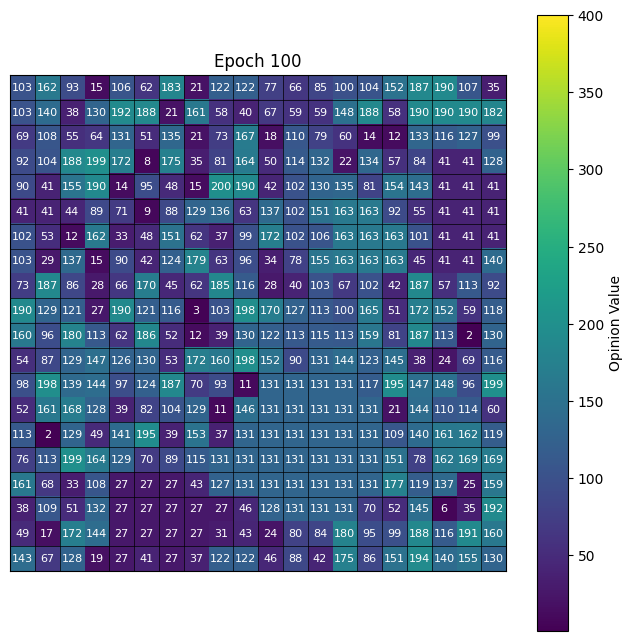

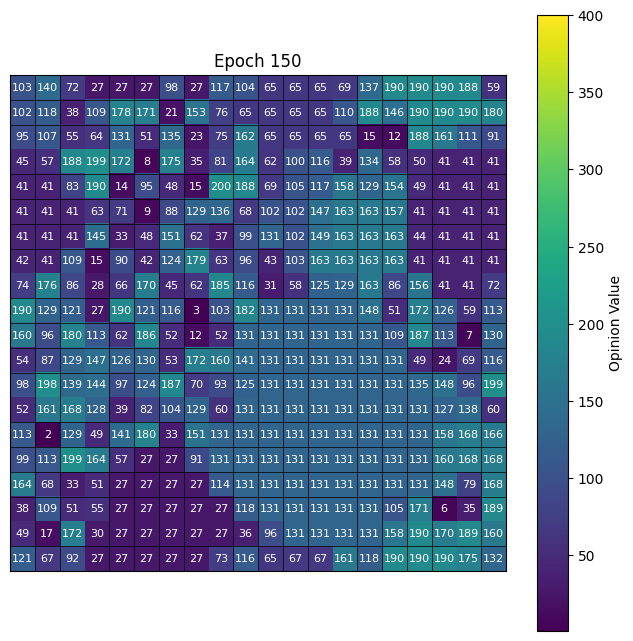

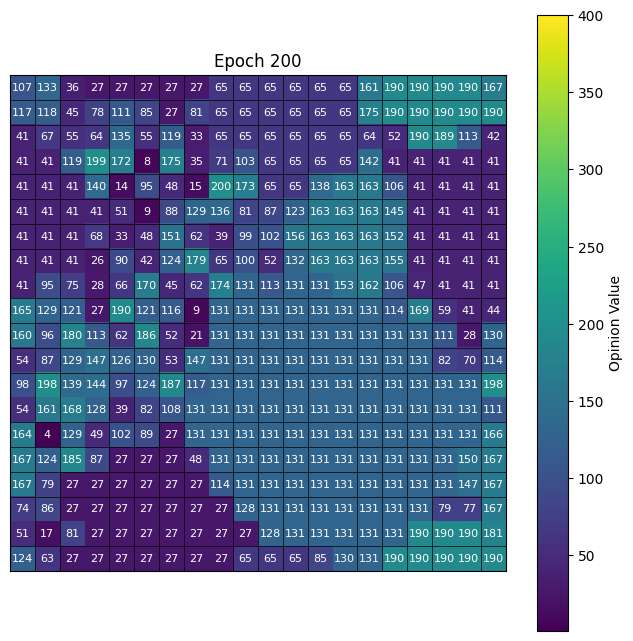

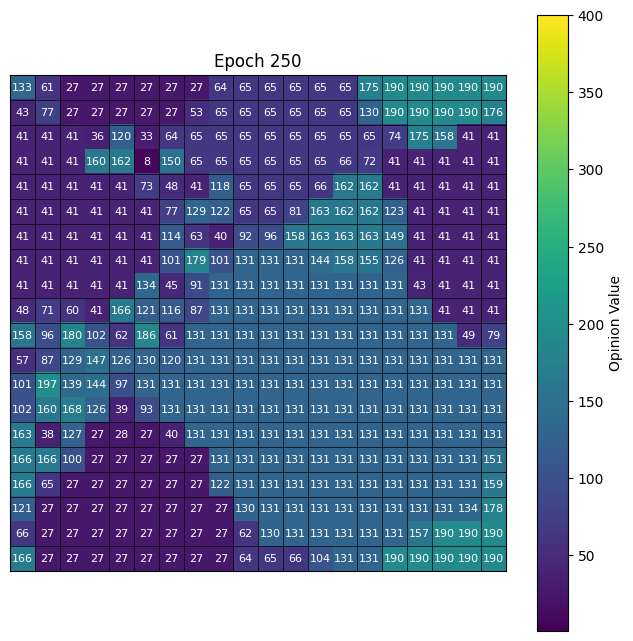

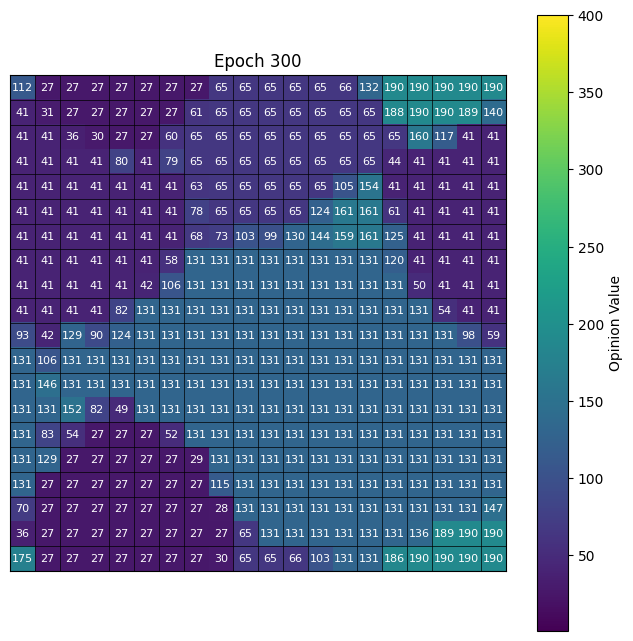

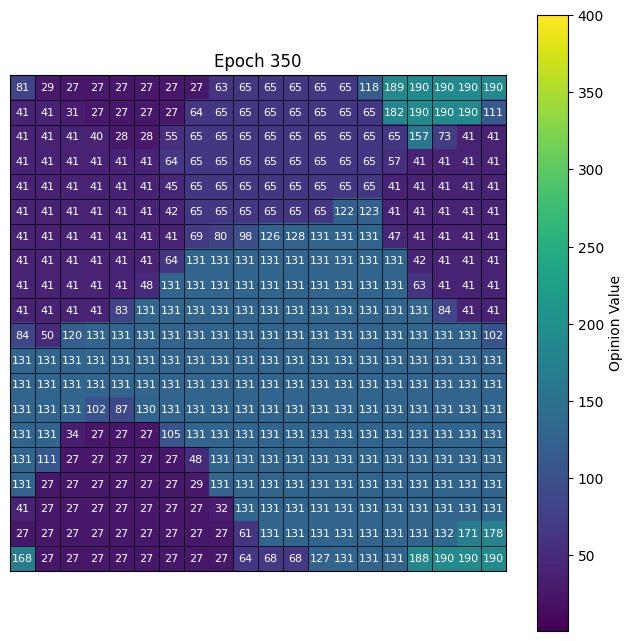

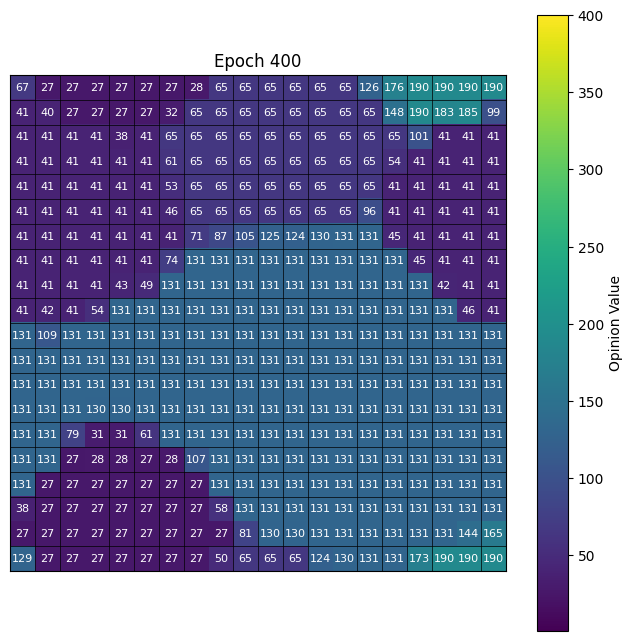

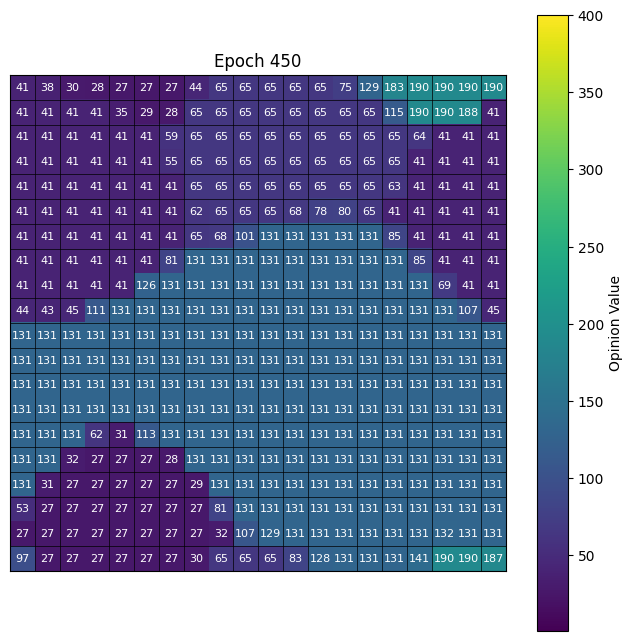

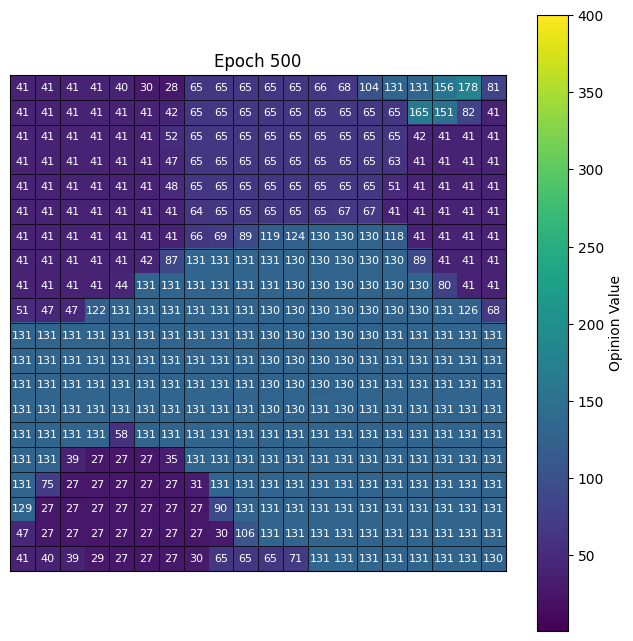

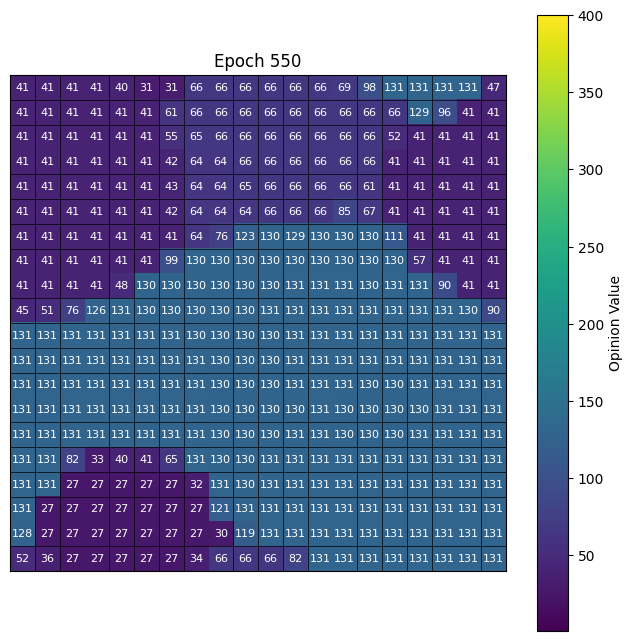

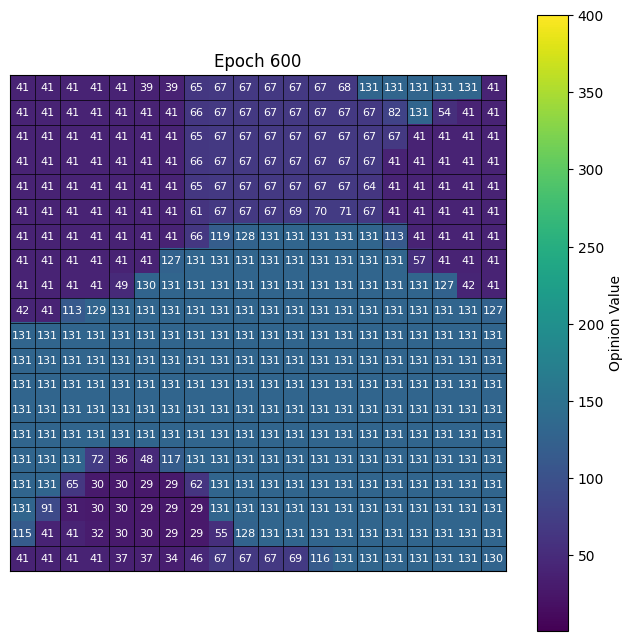

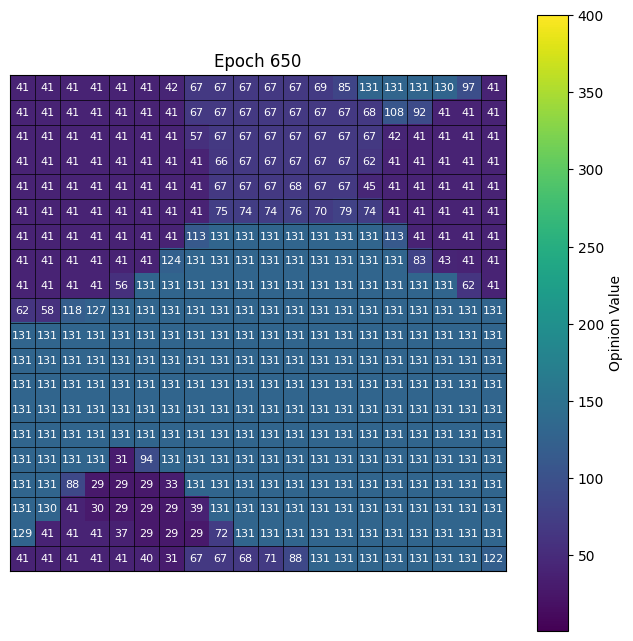

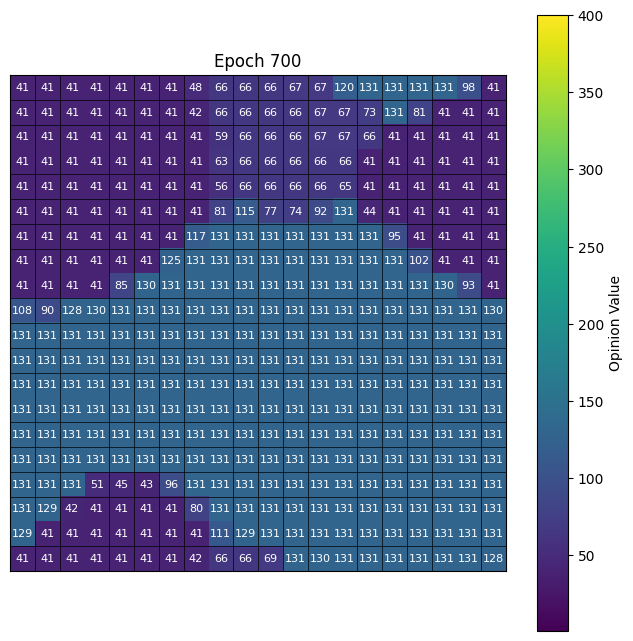

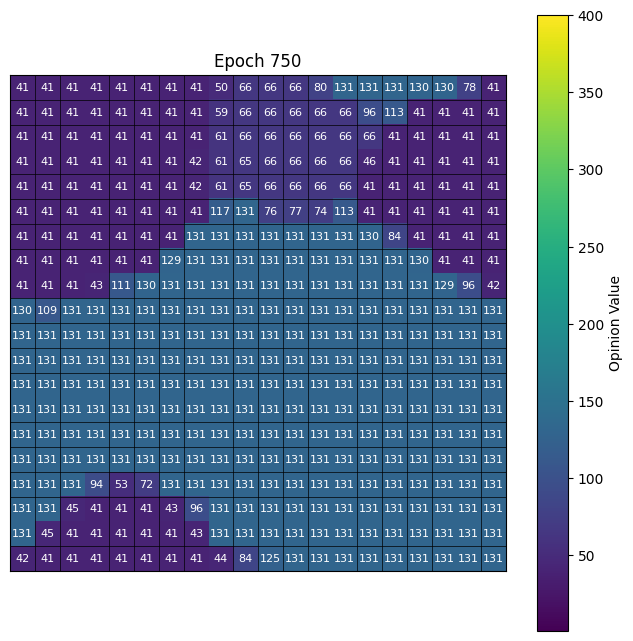

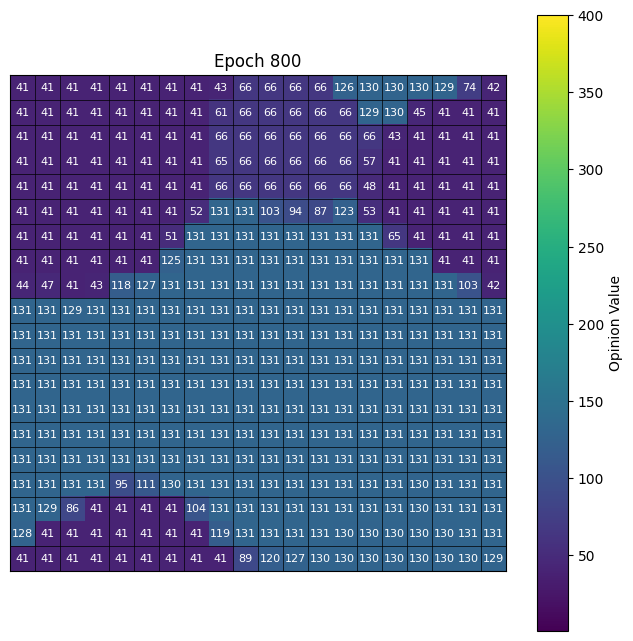

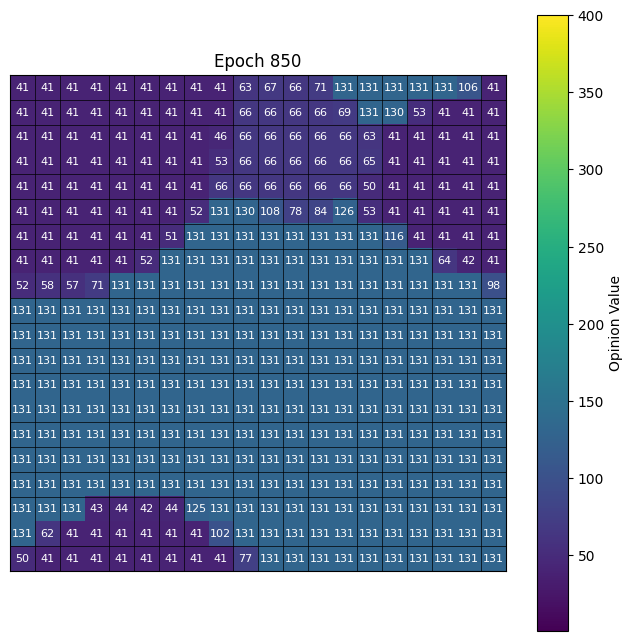

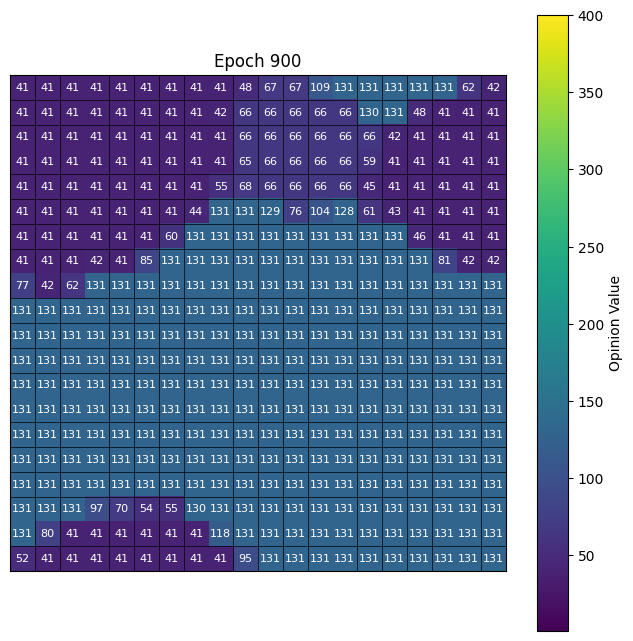

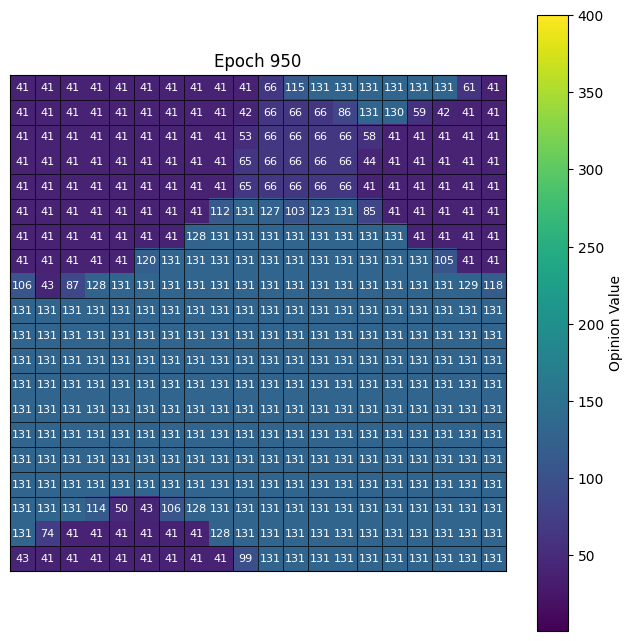

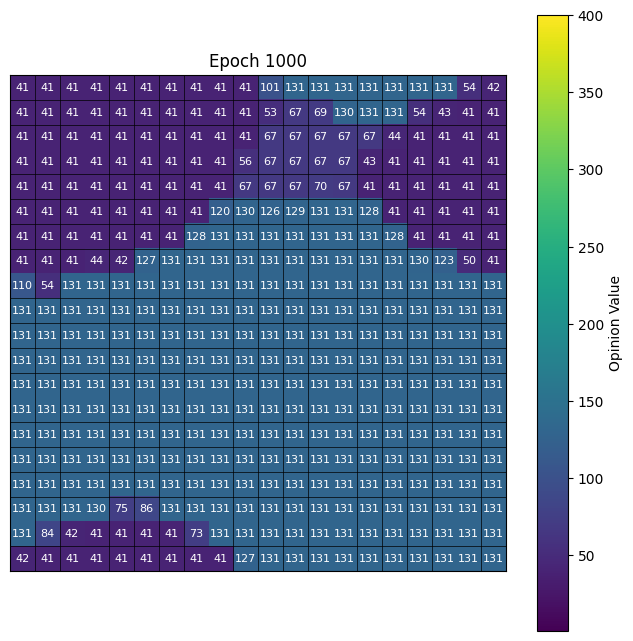

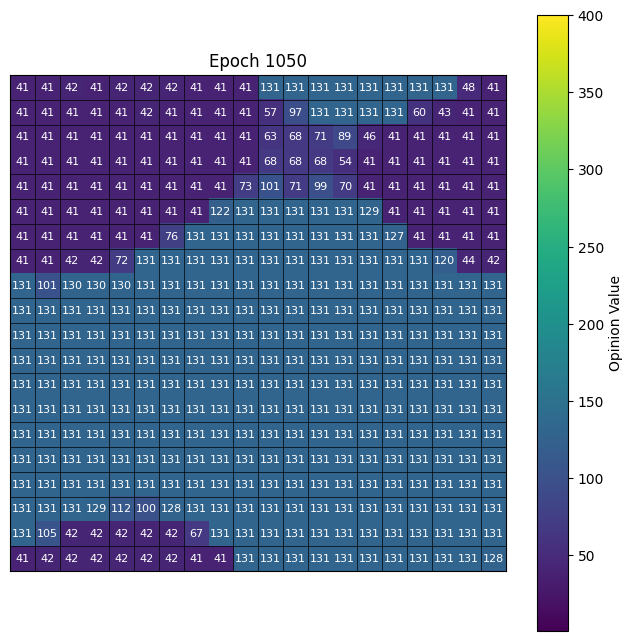

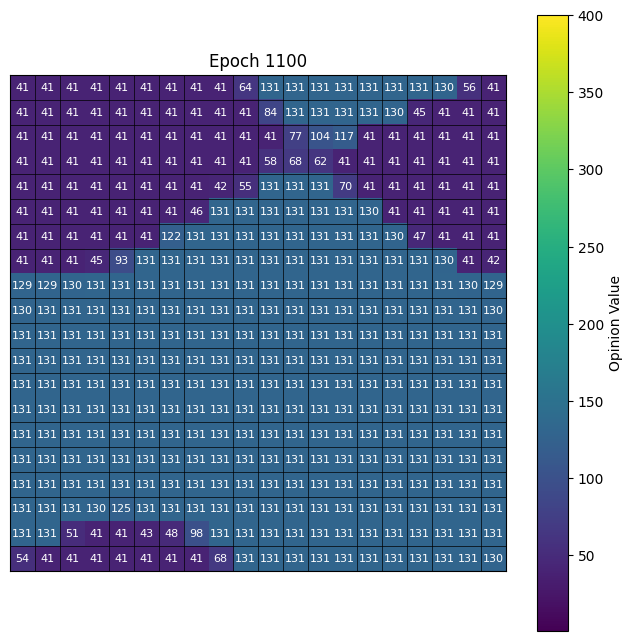

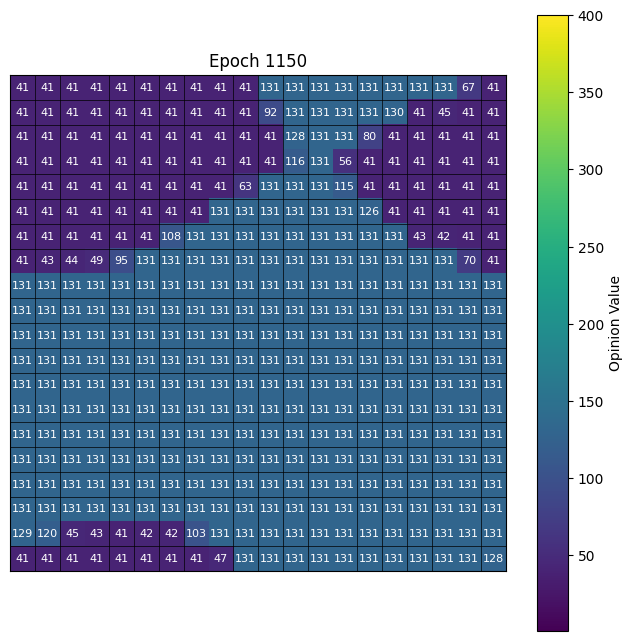

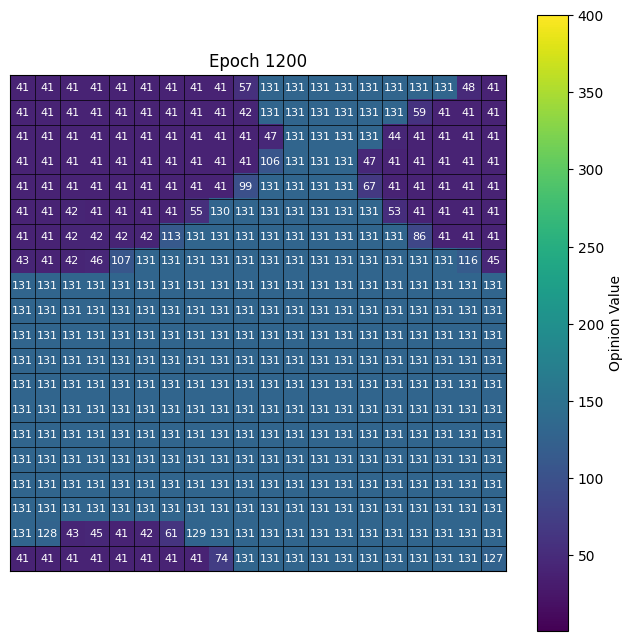

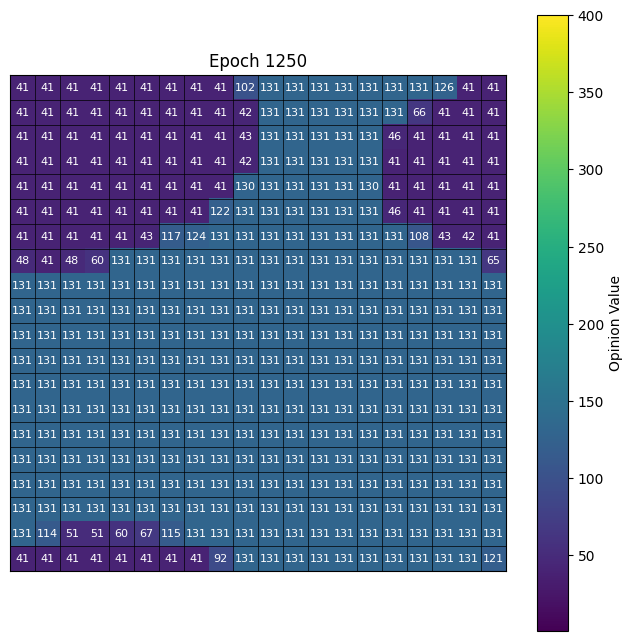

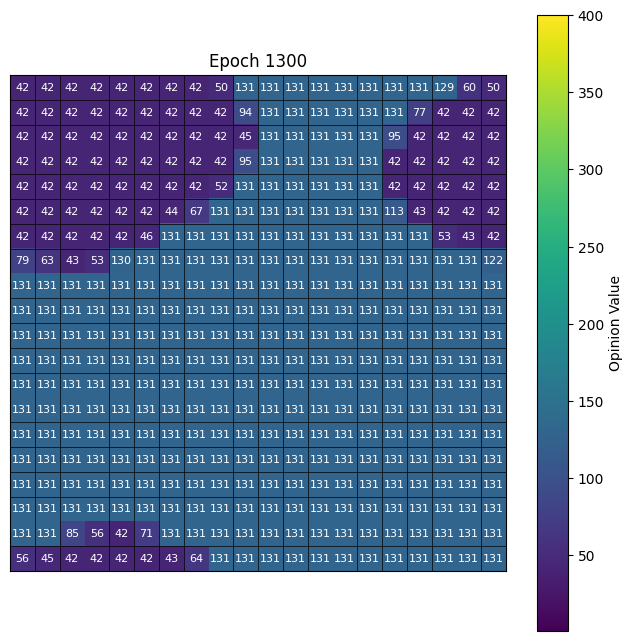

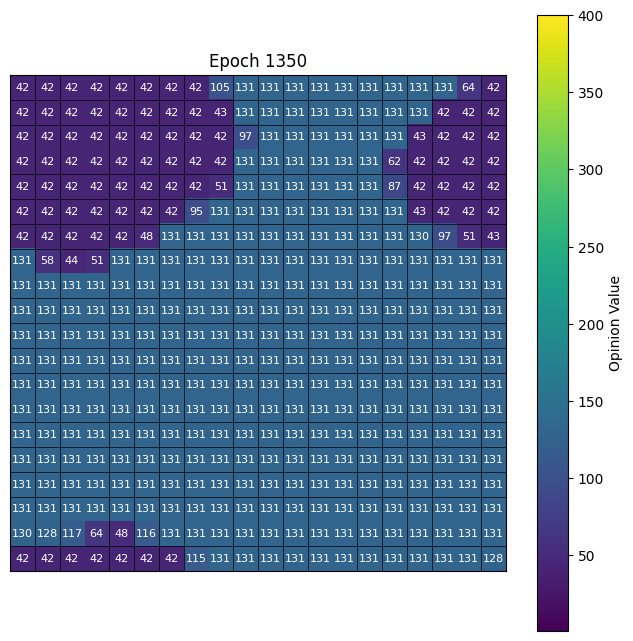

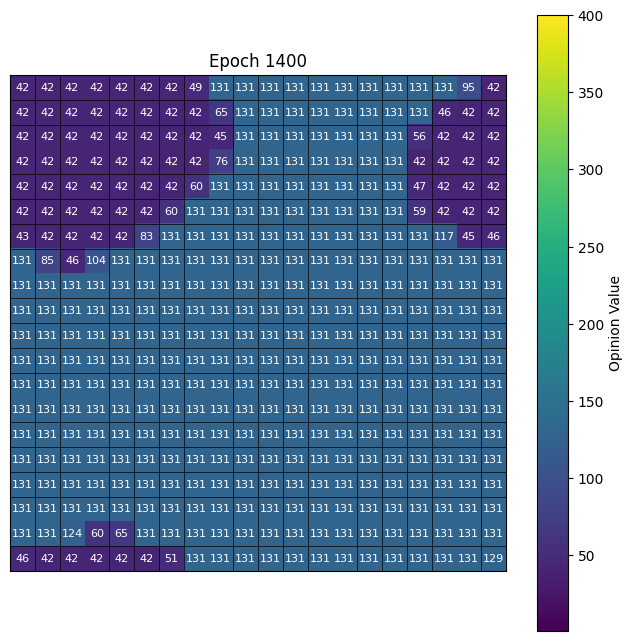

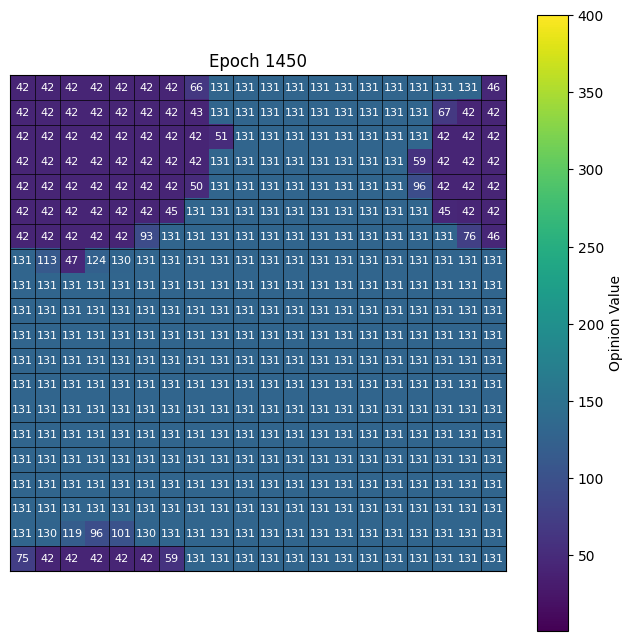

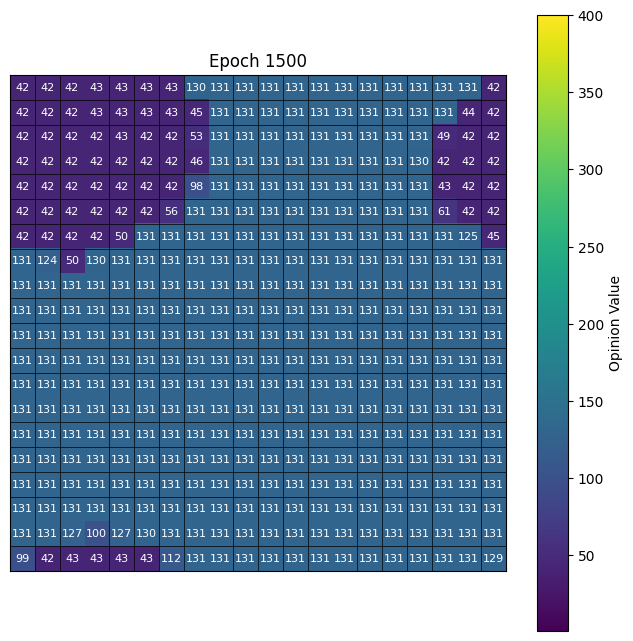

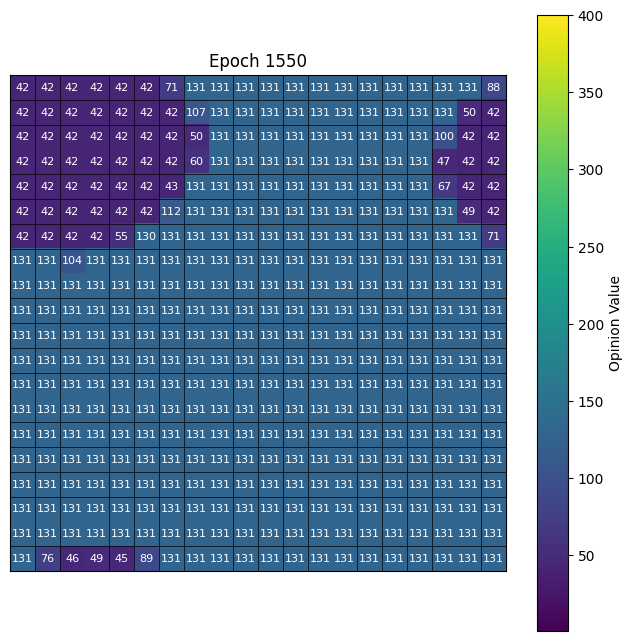

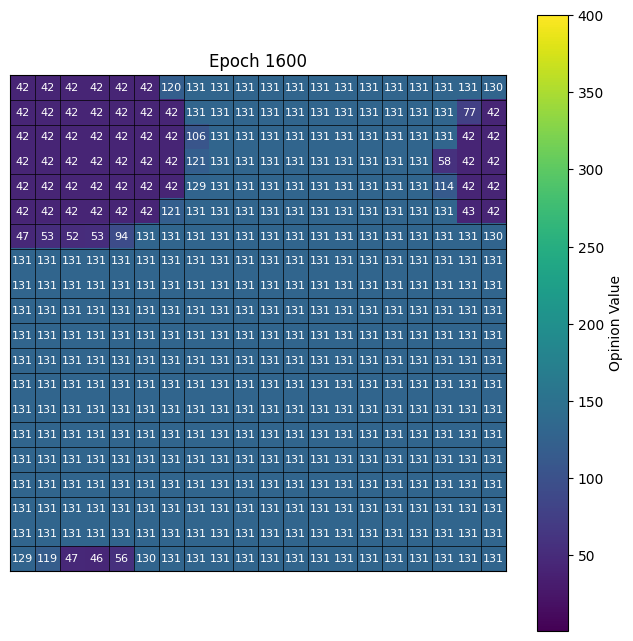

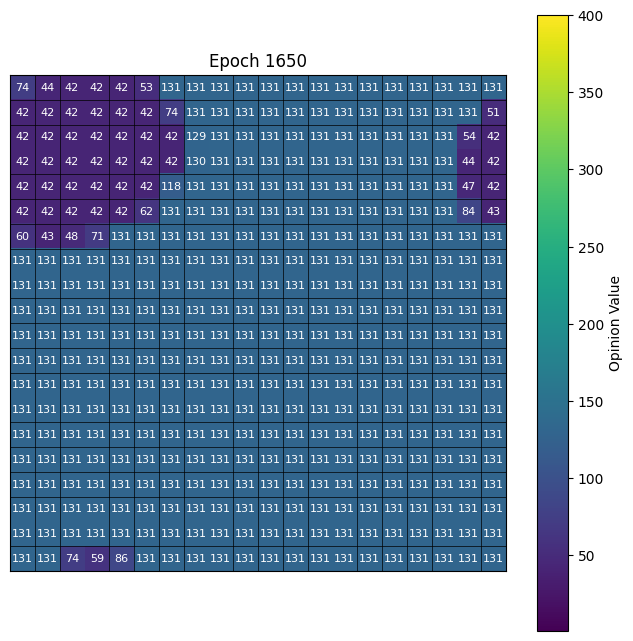

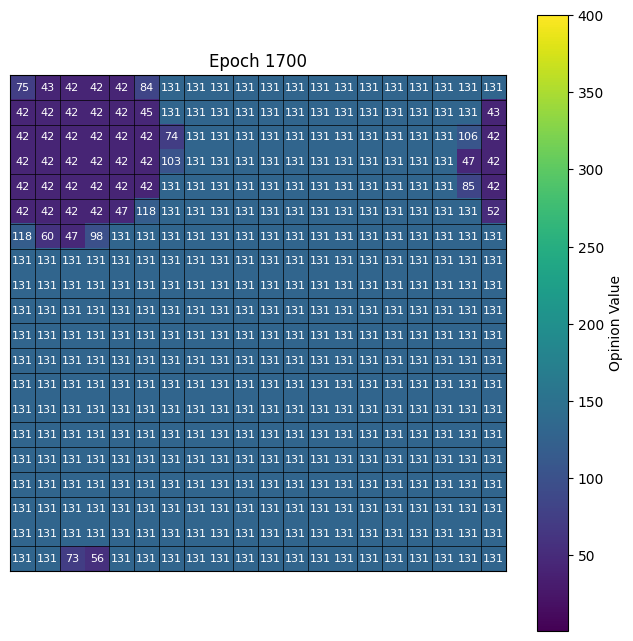

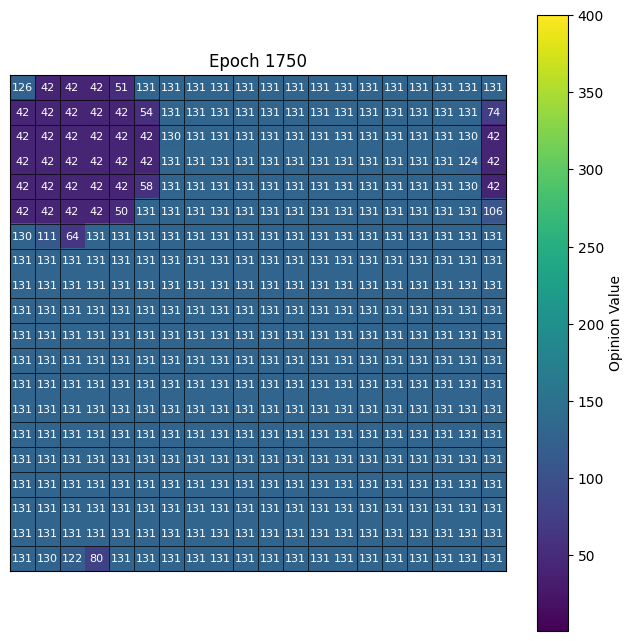

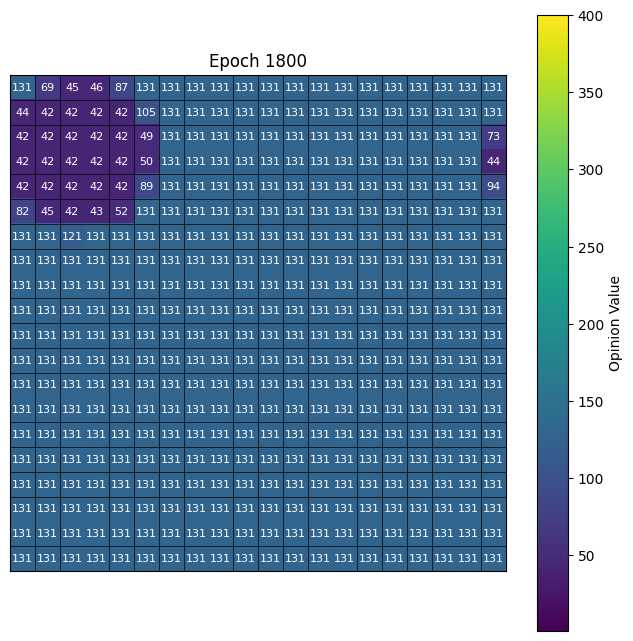

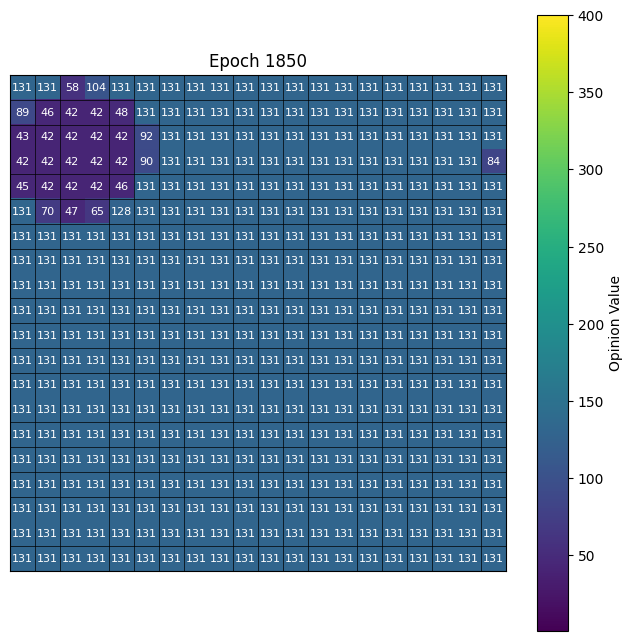

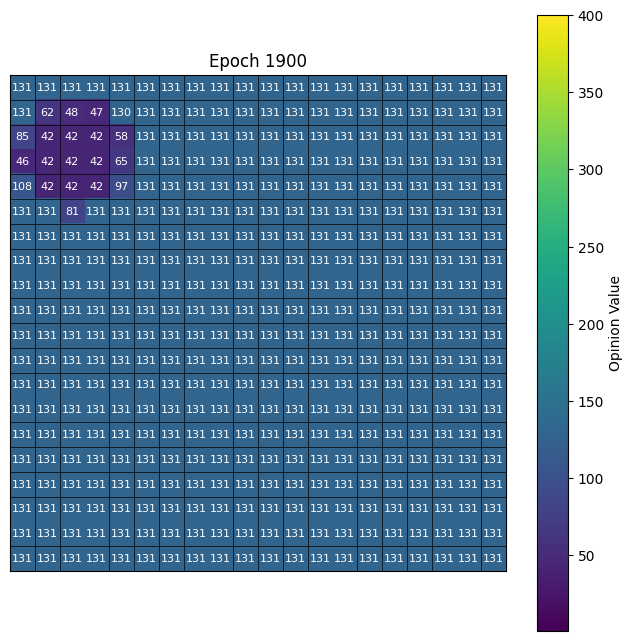

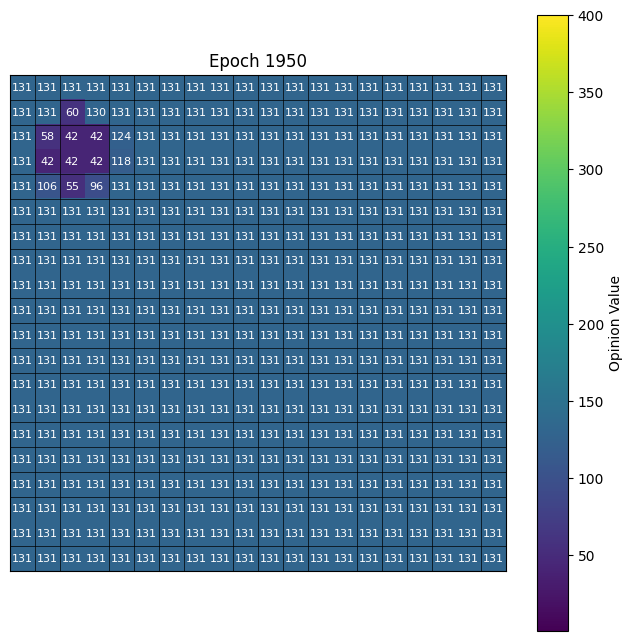

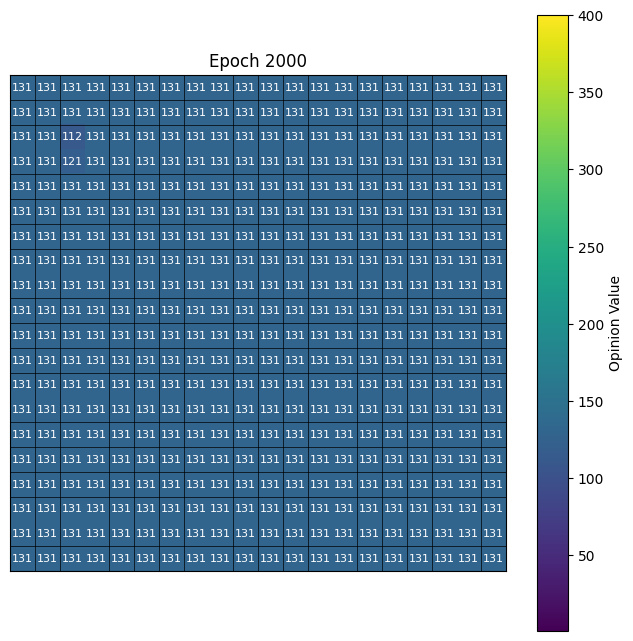

Converged after 2004 epochs. with count 1


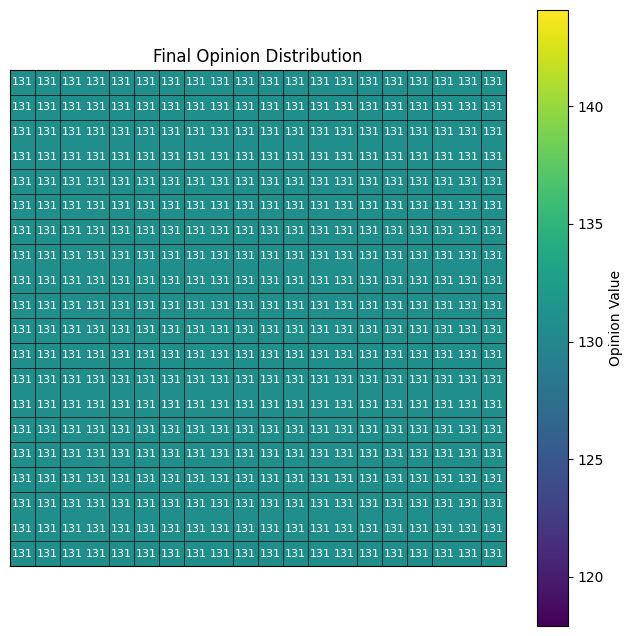

In [ ]:
# Initialize and simulate
L = 20 # length of side of the lattice
epochs = 100000 # number of epochs (optional)
stepSize = 50
max_opinion = 400
norm = mcolors.Normalize(vmin=1, vmax=max_opinion)
cmap = plt.cm.viridis  # Use the viridis colormap, or change to another continuous colormap

lattice = initialize_lattice(L)
plot_opinions(lattice, title="Initial Opinion Distribution", cmap=cmap, norm=norm)
countOpinions =  sznajdSim(lattice, epochs, stepSize, cmap=cmap, norm=norm)
#plot_opinions(lattice, title="Initial Opinion Distribution", cmap=cmap, norm=norm)

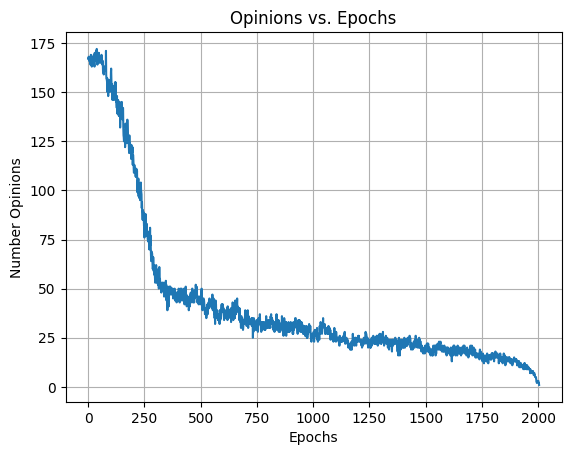

In [ ]:
epochs_range = range(len(countOpinions))

plt.plot(epochs_range, countOpinions)
plt.xlabel("Epochs")
plt.ylabel("Number Opinions")
plt.title("Opinions vs. Epochs")
plt.grid(True)
plt.show()

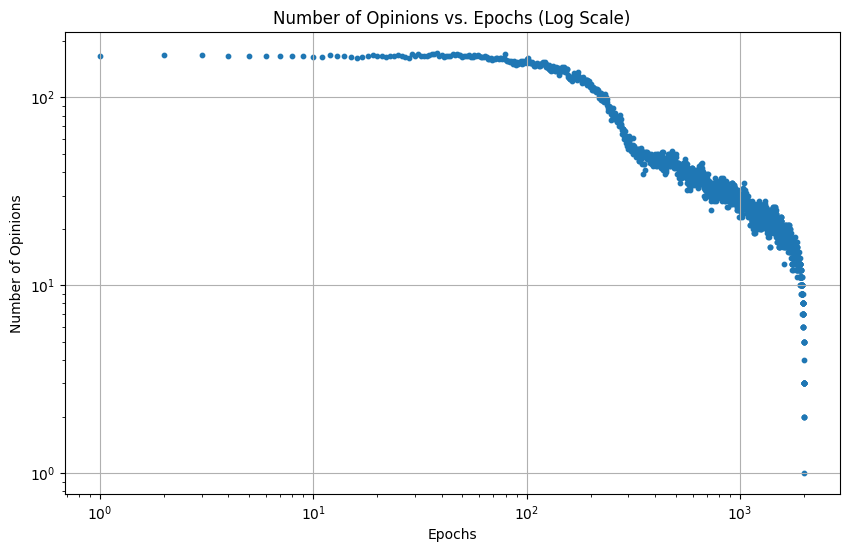

In [ ]:
epochs_range = range(len(countOpinions))

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(epochs_range, countOpinions, marker='o', s=10)  # Scatter plot
plt.xlabel("Epochs")
plt.ylabel("Number of Opinions")
plt.title("Number of Opinions vs. Epochs (Log Scale)")
plt.grid(True)

# Set the x and y axes to log scale
plt.xscale("log")
plt.yscale("log")

plt.show()